<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C3W2_Sarcasm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load package
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
# Hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [25]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-06-08 11:49:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-06-08 11:49:10 (139 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
# Load data from json.file to each list
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [27]:
print("sentences :", sentences[0])
print("labels :", labels[0])

sentences : former versace store clerk sues over secret 'black code' for minority shoppers
labels : 0


In [0]:
# Split the corpus into training and validation sets
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [0]:
# Instantiate tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# Tokenizer will then be fit on the training_sentences
tokenizer.fit_on_texts(training_sentences)

# Word index of tokenizer
word_index = tokenizer.word_index

# Convert training_sentences into sequence of numbers
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# Padding zero after the sentense
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert testing_sequences into sequence of numbers and padding them
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
# Convert padded and labels data into np.array 
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [31]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Training 30 epochs
num_epochs = 30

history = model.fit(
    training_padded,
    training_labels,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    verbose=2
)

Epoch 1/30
625/625 - 3s - loss: 0.6622 - accuracy: 0.5911 - val_loss: 0.5695 - val_accuracy: 0.7807
Epoch 2/30
625/625 - 3s - loss: 0.4235 - accuracy: 0.8354 - val_loss: 0.3787 - val_accuracy: 0.8416
Epoch 3/30
625/625 - 3s - loss: 0.3055 - accuracy: 0.8805 - val_loss: 0.3488 - val_accuracy: 0.8545
Epoch 4/30
625/625 - 3s - loss: 0.2544 - accuracy: 0.9011 - val_loss: 0.3410 - val_accuracy: 0.8571
Epoch 5/30
625/625 - 3s - loss: 0.2190 - accuracy: 0.9168 - val_loss: 0.3428 - val_accuracy: 0.8560
Epoch 6/30
625/625 - 3s - loss: 0.1926 - accuracy: 0.9262 - val_loss: 0.3513 - val_accuracy: 0.8539
Epoch 7/30
625/625 - 3s - loss: 0.1703 - accuracy: 0.9367 - val_loss: 0.3646 - val_accuracy: 0.8547
Epoch 8/30
625/625 - 3s - loss: 0.1518 - accuracy: 0.9433 - val_loss: 0.3804 - val_accuracy: 0.8557
Epoch 9/30
625/625 - 3s - loss: 0.1368 - accuracy: 0.9505 - val_loss: 0.4187 - val_accuracy: 0.8429
Epoch 10/30
625/625 - 3s - loss: 0.1226 - accuracy: 0.9564 - val_loss: 0.4222 - val_accuracy: 0.8511

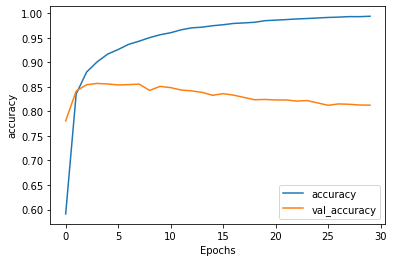

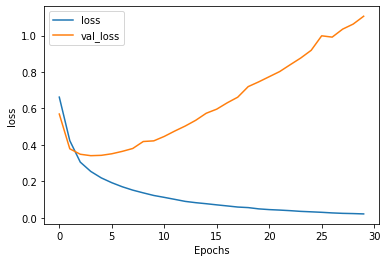

In [33]:
# Plot results
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
# Convert word_index form to the form {5: 'mother', 6: 'father'}
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [35]:
# NN weight's shapes
e = model.layers[0]
weights = e.get_weights()[0]  # shape: (vocab_size, embedding_dim)
print(weights.shape)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
  
out_v.close()
out_m.close()

In [0]:
# Download the value of the 16 dimensions per word as "vecs.tsv" and actual word
# associated with that as "meta.tsv"
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# Load tsv files to projector.tensorflow.org and can see mapping of words
# into the vector spaces

In [38]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

[[9.8176116e-01]
 [1.8212861e-05]]
